# Introduction
Welcome to todays lab session where we will focus on familiarising ourselves with some of the basic packages that we need for this module and understanding how images are stored in arrays. This lab is entirely in Python and should not require you writing many lines of code.

If you're unfamiliar with colab then please see the [documentation](https://colab.research.google.com/notebooks/welcome.ipynb). The easiest way to complete this session is to log into a Google account and save a copy to your google drive. Alternatively, you could save this document to your machine, or a lab machine (using Citrix to login) and open as a Jupyter notebook.


**Top Tips**
+ Check the documentation and links for help!
+ Remember assignment in Python is by reference! If you want to make a copy of a numpy object use [np.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) to do a [deepcopy](https://docs.python.org/3/library/copy.html).
+ If you want to do an integer divide use the '//' operator rather than '/' which may return a float.


# Preparation
We are going to download an example image to work with, but you can upload your own images by following the colaboratory [guidance](https://colab.research.google.com/notebooks/io.ipynb). Personally, I think the easiest way to do it is to use the files menu on the side of the screen.

We are also going to import some standard packages:
+ [opencv (cv2)](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html) A general purpose package for computer vision.
+ [matplotlib.pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot) A general purpose data visualising library
+ [numpy](https://numpy.org/doc/stable/) A numerical python package for arrays, linear algebra etc.

In [ ]:
!wget "https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG" -O meeting_house.jpg

%matplotlib inline
# import open cv
import cv2
# From matplotlib we only need the contents of pyplot, plt is the standard name for it
from matplotlib import pyplot as plt
# Numpy is called np as standard
import numpy as np

--2021-02-04 22:35:07--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1014224 (990K) [image/jpeg]
Saving to: ‘meeting_house.jpg’

meeting_house.jpg   100%[===================>] 990.45K  6.28MB/s    in 0.2s    

2021-02-04 22:35:07 (6.28 MB/s) - ‘meeting_house.jpg’ saved [1014224/1014224]



Images are most commonly represented as matrices (2D arrays) or 3D tensors (in order to get RGB channels). The dimensions of which are (height, width, 3) for RGB or (height, width,1) or sometimes (height, width) for grayscale images.

[OpenCV](https://opencv.org), a popular Computer Vision package, is a great tool to work with images, and provides a lot really useful tools that you can use to edit, transform, and work with your images. Python's OpenCV is actually a wrapper on top of the C/C++ implementation of the library, which makes it really fast.

In addition, everything in OpenCV can be converted to and from Numpy arrays, a really nice way to work with multidimensional objects like matrices and tensors.

Like OpenCV, all Python calls to the Numpy library actually get converted and executed into C, which makes it really fast as well.

# Visualising images
Python has a great data visualisation library called [matplotlib](https://matplotlib.org/).

Take a look at [this tutorial](https://matplotlib.org/3.1.1/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for how to display images. Note that Python has lots of mechanisms for reading image files, please try and stick to using OpenCV.

+ Ascertain the type of the loaded image object using the function [type](https://docs.python.org/3/library/functions.html#type)
+ Next find and print the data type and size of the image data using the relevant [properties of the object](https://numpy.org/doc/stable/reference/generated/numpy.dtype.html#numpy.dtype).
+ Display the image using [this function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow) from matplotlib.
+ There are different approaches to convert from a colour image to grayscale depending on whether you treat all the colours as equally important. For now, use np.mean to average over the colour channels. Plot the grayscale image, it might look a bit weird so investigate the 'cmap' key-word argument

image object type is: <class 'numpy.ndarray'>
image data type is: uint8
image shape is: (1800, 2400, 3)


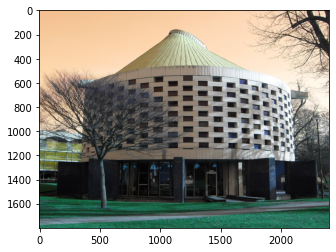

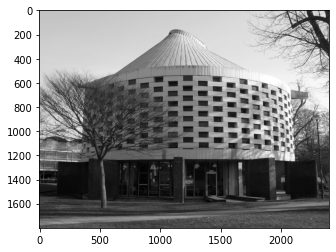

In [ ]:
# Load the data
img = cv2.imread('./meeting_house.jpg')

# Fill in the second half of the print statements
print('image object type is:', type(img))
print('image data type is:', img.dtype)
print('image shape is:', img.shape)

# Next display the image
plt.imshow(img)
plt.show()

# Convert it to grayscale
img_gray = np.mean(img, axis=-1)
# Display the grayscale image
plt.imshow(img_gray, cmap='gray') # Default colorscheme is 'jet'
plt.show()



# Further visualisation
Did you notice anything different about the colour image you plotted before?

You'll see that the colors are off - this is because OpenCV uses a BGR ordering of their image channels, whereas when you want to plot in something other than OpenCV, you'll need to convert it. In Colab, you cannot use the standard OpenCV 'imshow' function, so we use matplotlib.

+ We can convert from BGR to RGB using this [OpenCV function](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html)
+ We can also do the same thing using numpy indexing (see [the docs](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) and [also](https://numpy.org/doc/stable/reference/arrays.indexing.html)). There's a neat trick for reversing arrays by indexing the final dimension with '::-1'. Try and work out what this means and check it works by plotting the images.
+ Another neat thing you can do with numpy is to halve the spatial image resolution (subsample by a factor of 2). Again this uses array indexing, this time for the rows, cols indices use '::2'. Note you can also change image sizes using [opencv](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html). Try lowering the resolution further, how does the image change?



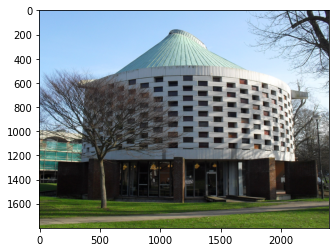

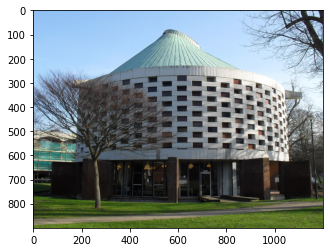

In [ ]:
# Convert from BGR to RGB
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert from BGR to RGB using numpy, the ::-1 corresponds to loop over the whole set of indicies backwards
imgrgb_np = img[:,:,::-1]

plt.imshow(imgrgb)
plt.show()

# Halve the spatial resolution by sampling every other pixel.
plt.imshow(imgrgb[::2,::2,:])
plt.show()


# Image co-ordinate system
Matplotlib allows us to plot lines, and points on top of the image. This can be very useful to convey information about where things are.

+ Experiment with plotting points on top of the image using [plt.scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html). What do you notice about the coordinate system? Can you change the size/shape of what you're plotting?

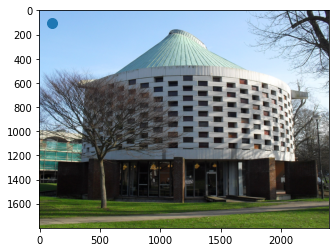

In [ ]:
# Draw the rgb image
plt.imshow(imgrgb)
# Draw some points on top using scatter
plt.scatter(100,100, s=100)
plt.show()

# Manipulating Image Pixels
Let's try making some changes to the images, and see how that affects things. For each of the edits, try not to overwrite the original image data (why not?). Remember assignment in Python is by reference! If you want to make a copy of a numpy object use [np.copy](https://numpy.org/doc/stable/reference/generated/numpy.copy.html) to do a [deepcopy](https://docs.python.org/3/library/copy.html)

1. Manipulate the colour of specific pixels, or ranges of pixels. Note the [different mechanisms for slicing through Python arrays](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing) and [also](https://numpy.org/doc/stable/reference/arrays.indexing.html).

1. Threshold the image using numpy, there's a useful function called [clip](https://numpy.org/doc/stable/reference/generated/numpy.clip.html)

1. Try inceasing the brightness of the image by multiplication (note that you should keep it within the original range of values using clip).  **watch out for overflow (as the data is uint8). You might want to cast it to something else to avoid this**

1. Try modifying the brightness of just the left side of the image, hint use range indexing.

1. What do the comparison operators such as '>' return when applied to an array?


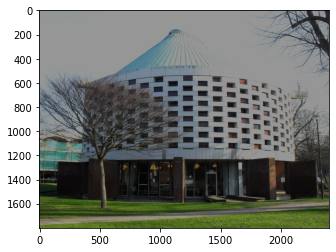

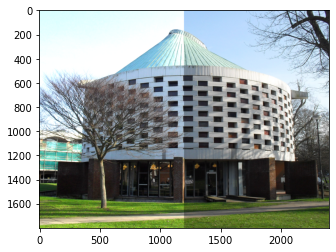

comparisons return an array of type:  bool


In [ ]:
# Manipulate the colour of specific pixels

# Threshold the image using numpy
img_th = np.clip(imgrgb, 0, 150)
# When we plot the image tell matplotlib what the min/max values to plot between are (0,255)
plt.imshow(img_th, vmin=0, vmax=255)
plt.show()

# Increase the image brightness and clip to keep in the correct range.

# Increase the brightness of the left side of the image.
img_left_bright = np.copy(imgrgb)
# Note that when we multiply by a floating point number we implicitly recast to float so it doesn't overflow!
img_left_bright[:,0:imgrgb.shape[1]//2,:] = np.clip(np.float32(img_left_bright[:,:imgrgb.shape[1]//2,:])*1.5,0, 255)
plt.imshow(img_left_bright)
plt.show()

# Check the type of the array after applying a comparison operator
print('comparisons return an array of type: ',(img_gray > 100).dtype)

# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.
+ Can we clip the value of an image using '>' and array indexing?
+ Draw each of the colour channels separately in the right colours. hint: Create a new image to draw each colour channel using [np.zeros_like](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) and use matpltolib's [subplot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplot.html) functionality.
+ Make the centre of the image grayscale

comparisons return an array of type:  bool


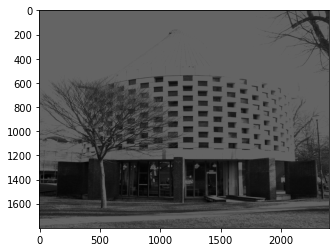

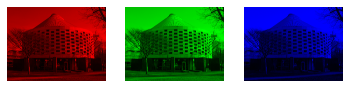

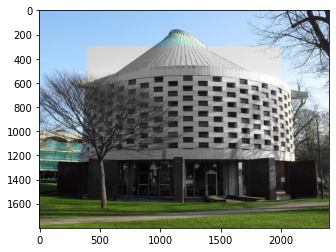

In [ ]:
# Clip the image below a certain threshold using >
img_gt_100 = img_gray > 100
print('comparisons return an array of type: ',img_gt_100.dtype) # Comparisons return boolean arrays that can be used for indexing!
img_gray_clip_100 = np.copy(img_gray)
img_gray_clip_100[img_gt_100] = 100 # this is the same as clipping at 100
plt.imshow(img_gray_clip_100, cmap='gray', vmax=255)
plt.show()

# Create blank images and only fill the correct colour channel.
for i in range(3):
  img_channel = np.zeros_like(imgrgb)
  img_channel[:,:,i] = imgrgb[:,:, i]
  plt.subplot(1,3,i+1)
  plt.imshow(img_channel)
  plt.axis('off')
plt.show()


img_gray_centre = np.copy(imgrgb)

min_row_index = imgrgb.shape[0]//6
max_row_index = imgrgb.shape[0]-min_row_index
min_col_index = imgrgb.shape[1]//6
max_col_index = imgrgb.shape[1]-min_col_index
img_gray_centre[min_row_index:max_row_index, min_col_index:max_col_index, :] = np.expand_dims(img_gray[min_row_index:max_row_index, min_col_index:max_col_index], axis=-1)
plt.imshow(img_gray_centre)
plt.show()

